z = Hx

In [266]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

H = np.array([1,2,3,4,5,6,7,8,9,9,
              5,4,3,2,1,0,1,2,3,4,
              5,3,8,9,5,1,7,3,4,6,
              3,4,3,2,3,6,3,7,1,2])
H = H.reshape(4,10)
print H

m, n = H.shape
m, n

[[1 2 3 4 5 6 7 8 9 9]
 [5 4 3 2 1 0 1 2 3 4]
 [5 3 8 9 5 1 7 3 4 6]
 [3 4 3 2 3 6 3 7 1 2]]


(4, 10)

(0, 19.550000000000001)

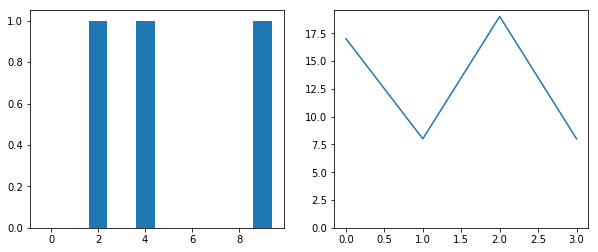

In [267]:
xtrue = np.array([0,0,1,0,1,0,0,0,0,1])
#xtrue = np.array([1,0,0,0.5,0])
#xtrue = np.array([1,0.3,2,0.5,1])
z = np.dot(H, xtrue)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(np.arange(n), xtrue)
ax[1].plot(np.arange(m), z)
ax[1].set_ylim(0,None)

(0, 19.550025841511143)

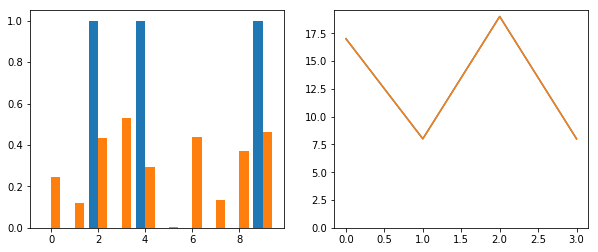

In [268]:
lam = 0.1

# L2
x_ls = np.dot(np.linalg.inv(np.dot(H.T, H) + lam * np.eye(n)), np.dot(H.T, z))

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(np.arange(n)-0.2, xtrue, width=0.4)
ax[0].bar(np.arange(n)+0.2, x_ls, width=0.4)
ax[1].plot(np.arange(m), np.dot(H, xtrue))
ax[1].plot(np.arange(m), np.dot(H, x_ls))
ax[1].set_ylim(0,None)

(0, 21.151528591271081)

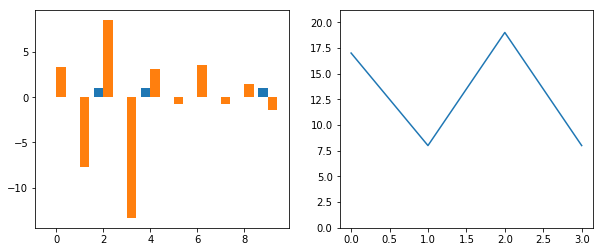

In [269]:
# Green's function meshod (最小二乗)

from green_function import GreenFunction

x0 = x_ls+0.1
g = GreenFunction(param0=x0,
                  state0=np.dot(H, x0),
                  obs=z,
                  obs_error=0.1,
                  back_error=1.0)

e = np.eye(n) * 0.1
for i in range(n):
    g.set_values(x0+e[i], np.dot(H, x0+e[i]))
    
x = g.solve_ls()

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(np.arange(n)-0.2, xtrue, width=0.4)
ax[0].bar(np.arange(n)+0.2, x, width=0.4)
ax[1].plot(np.arange(m), np.dot(H, xtrue))
ax[1].plot(np.arange(m), np.dot(H, x))
ax[1].set_ylim(0,None)

(0, 19.550061991840046)

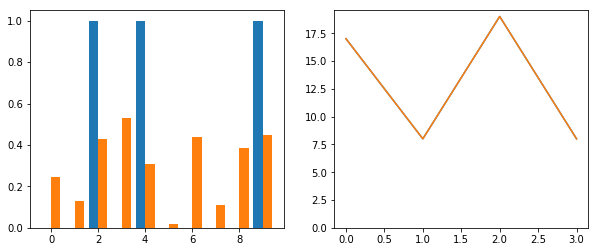

In [270]:
# L2 regression with Green's function meshod

x = g.solve_ridge()

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(np.arange(n)-0.2, xtrue, width=0.4)
ax[0].bar(np.arange(n)+0.2, x, width=0.4)
ax[1].plot(np.arange(m), np.dot(H, xtrue))
ax[1].plot(np.arange(m), np.dot(H, x))
ax[1].set_ylim(0,None)

[  3.34299643  -7.7823819    8.53493039 -13.37063034   3.14255482
  -0.77192285   3.53910713  -0.76636535   1.47006761  -1.43965899]
[  4.65100076  -6.86503126  10.03276797 -11.95954671   3.82936433
  -0.61285654   4.36042486  -0.2630402    1.50679671  -0.9153014 ]
[  3.71655268  -6.07701346   9.35629617 -10.44347369   2.89642047
  -0.20767209   3.58496625  -0.29546713   0.65822155   0.29380402]
[ 3.28308361 -5.7342292   9.02419483 -9.63022623  2.39603846 -0.25595481
  3.21099694 -0.02752666  0.4902155   0.54593029]
[ 2.92351805 -5.30926449  8.68637548 -8.82171256  1.94364097 -0.26290405
  2.92112482  0.14472906  0.70640561  0.35682692]
[ 2.55443519 -4.84609677  8.34448509 -8.04412397  1.51574868 -0.12690843
  2.63397183  0.14910279  0.82870701  0.30748476]
[ 2.17691753 -4.36478454  8.00053515 -7.28378614  1.09969138  0.08801879
  2.34486481  0.06273054  0.88210316  0.35529329]
[ 1.77954078 -3.87702062  7.6488698  -6.53520567  0.70325008  0.20065667
  2.07297885  0.0656628   0.92315301

(0, 25.163120237001607)

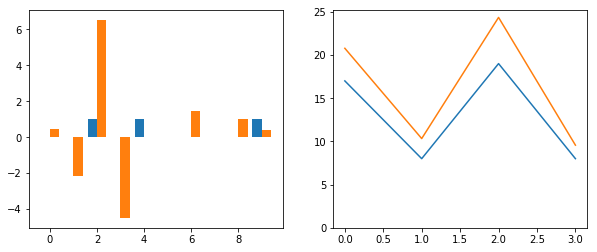

In [271]:
# ADMM with Green's function meshod

x = g.solve_sparse_ADMM(lam=0.001, mu=2.)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(np.arange(n)-0.2, xtrue, width=0.4)
ax[0].bar(np.arange(n)+0.2, x, width=0.4)
ax[1].plot(np.arange(m), np.dot(H, xtrue))
ax[1].plot(np.arange(m), np.dot(H, x))
ax[1].set_ylim(0,None)

[  1.10448921e+10  -8.18204759e+09  -1.24339214e+10   1.19426497e+10
  -9.07980521e+09   6.70823243e+09   2.03910713e+00  -8.75740351e-01
   1.47006761e+00  -6.89658993e-01] [ 1. -1. -1.  1. -1.  1.  1. -1.  1. -1.]
[  1.10441540e+10  -8.18103735e+09  -1.24347927e+10   1.19433903e+10
  -9.08008256e+09   6.70809144e+09   1.17372312e+00  -1.30954457e-01
   9.23411155e+00  -1.02848895e+01] [ 1. -1. -1.  1. -1.  1.  1.  1.  1. -1.]


(0, 12137198936334.941)

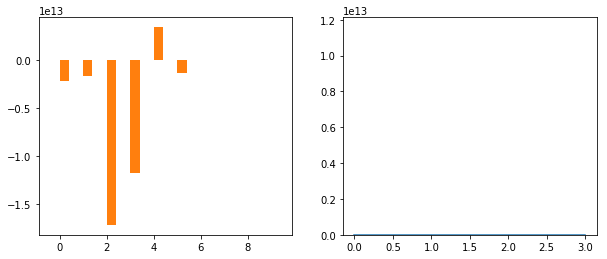

In [281]:
# L1 regression with Green's function meshod

x = g.solve_sparse()
g.set_values(x, np.dot(H, x))
x = g.solve_sparse()

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(np.arange(n)-0.2, xtrue, width=0.4)
ax[0].bar(np.arange(n)+0.2, x, width=0.4)
ax[1].plot(np.arange(m), np.dot(H, xtrue))
ax[1].plot(np.arange(m), np.dot(H, x))
ax[1].set_ylim(0,None)

In [274]:
np.sign([0,1])

array([0, 1])

# ADMM

[0.9953324 0.        0.        0.        0.       ]


(-1, 2)

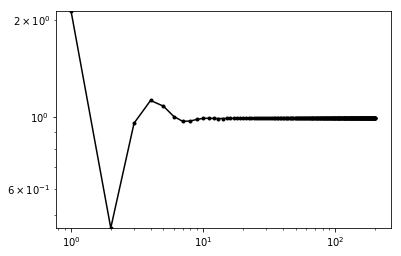

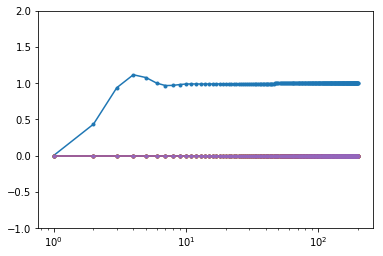

In [4]:
from ADMM import ADMM

x_SpM, cost, x = ADMM(H, z1, n, lam=0.1, mu=1, num=200, x0=x_l2)
print x_SpM

plt.loglog(cost, 'k.-')
plt.ylim(min(cost), max(cost[1:]))

plt.figure()
plt.semilogx(x, '.-')
plt.ylim(-1,2)


# 降下法

$J = \frac{1}{2} x^T B^{-1} x + \frac{1}{2} (z-Hx)^T R^{-1} (z-Hx) + a|x|$

$\frac{dJ}{dx} = B^{-1} x - H^T R^{-1} (z-Hx) + a \cdot sign x$

array([1.05222819e+00, 7.81469900e-01, 1.62296974e-01, 7.24047499e-04,
       5.65756023e-04])

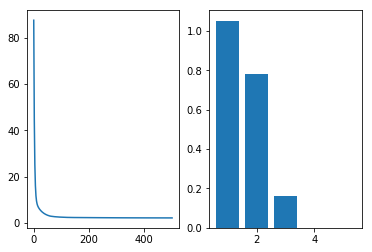

In [311]:
dot3 = lambda v1, v2, v3: np.dot(np.dot(v1, v2), v3)

def cost(H, z, x, a):
    jo = 0.5 * np.dot(z - np.dot(H, x), z - np.dot(H, x))
    jb = a * np.abs(x).sum()
    return jo + jb
        
def grad(H, z, x, a):
    return -np.dot(H.T, z - np.dot(H, x)) + a * np.sign(x)


x = np.zeros(n)
z = z2
a = 1.1
alpha = 0.001

J = [cost(H, z, x, a)]
for i in range(500):
    g = grad(H, z, x, a)
    x = x - alpha * g
    J.append(cost(H, z, x, a))
    
fig, ax = plt.subplots(1,2)
ax[0].plot(J)
ax[1].bar(np.arange(n)+1, x)
x

# DFP

break on 103


(array([ 9.98222525e-01,  9.99669503e-01,  2.53997630e-05,  5.18376899e-06,
        -9.74344949e-06]),
 array([ 0.00837163,  0.00951684,  0.02385621,  0.03819557, -0.16065922]))

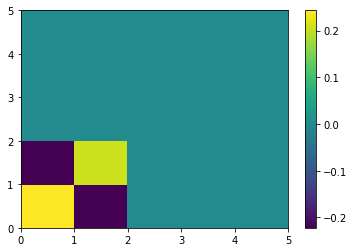

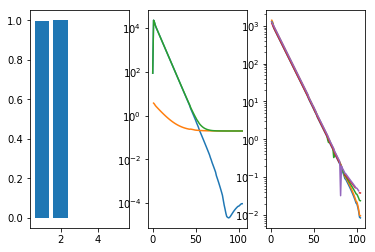

In [399]:
dot4 = lambda v1, v2, v3, v4: np.dot(np.dot(v1, v2), np.dot(v3, v4))

def cost(H, z, x, a):
    jo = 0.5 * np.dot(z - np.dot(H, x), z - np.dot(H, x))
    jb = a * np.abs(x).sum()
    #jb = a * np.dot(x, x)
    return jo, jb, jo+jb

def grad(H, z, x, a):
    g1 = -np.dot(H.T, z - np.dot(H, x))
    g2 = np.where(x==0, 0, a * np.sign(x))
    #g2 = np.where(np.abs(x)<1e-8, 0, a * np.sign(x))
    #g2 = 2. * a * x
    return g1 + g2

def DFP(A, z, x, a, n):
    
    alpha = 0.1
    B = np.eye(n)
    Binv = B.copy()
    
    J = [cost(A, z, x, a)]
    g = [grad(A, z, x, a)]
    
    for i in range(1000):
        
        dx = - alpha * np.dot(Binv, g[-1])
        x += dx
        #x = np.where(np.abs(x)<1e-8, 0, x)
        
        gb = g[-1].copy()
        g.append(grad(A, z, x, a))
        J.append(cost(A, z, x, a))
        y = g[-1] - gb
        
        ydx = np.dot(y, dx)
        
        if ydx < 1e-8:
            print 'break on',i
            break
        
        H = Binv.copy()
        Binv += np.dot(dx[:,None], dx[None,:]) / ydx
        Binv -= dot4(H, y[:,None], y[None,:], H.T) / dot3(y[None,:], H, y)
    
    plt.pcolor(Binv)
    plt.colorbar()
    return x, np.asarray(J), g

a = 0.1

x, J, g = DFP(H, z2, np.zeros(n), a, n)

fig, ax = plt.subplots(1,3)
ax[0].bar(np.arange(n)+1, x)
ax[1].semilogy(J)
ax[2].semilogy(g)
x, g[-1]

# BFGS

break on 86


array([ 9.98818704e-01,  9.98823576e-01, -8.05034374e-07,  6.62719708e-05,
        1.74755059e-05])

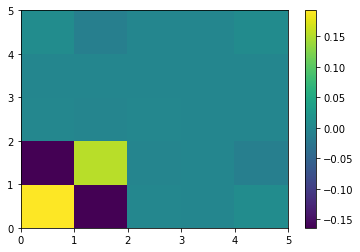

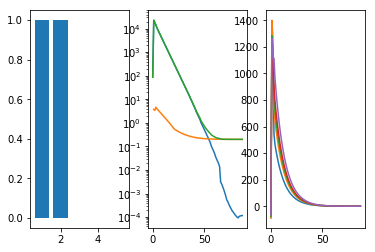

In [402]:
dot4 = lambda v1, v2, v3, v4: np.dot(np.dot(v1, v2), np.dot(v3, v4))

def cost(H, z, x, a):
    jo = 0.5 * np.dot(z - np.dot(H, x), z - np.dot(H, x))
    jb = a * np.abs(x).sum()
    #jb = a * np.dot(x, x)
    #print jo, jb
    return jo, jb, jo+jb

def grad(H, z, x, a):
    g1 = -np.dot(H.T, z - np.dot(H, x))
    g2 = np.where(x==0, 0, a * np.sign(x))
    #g2 = np.where(np.abs(x)<1e-8, 0, a * np.sign(x))
    #g2 = 2. * a * x
    return g1 + g2

def BFGS(A, z, x, a, n):
    
    alpha = 0.1
    B = np.eye(n)
    Binv = B.copy()
    
    J = [cost(A, z, x, a)]
    g = [grad(A, z, x, a)]
    
    for i in range(1000):
        
        dx = - alpha * np.dot(Binv, g[-1])
        x += dx
        #x = np.where(np.abs(x)<1e-8, 0, x)
        
        gb = g[-1].copy()
        g.append(grad(A, z, x, a))
        J.append(cost(A, z, x, a))
        y = g[-1] - gb
        
        ydx = np.dot(y, dx)
        
        if ydx < 1e-8:
            print 'break on',i
            break
        
        H = Binv.copy()
        C = np.eye(n) - np.dot(y[:,None], dx[None, :]) / ydx
        Binv = dot3(C.T, H, C) + np.dot(dx[:,None], dx[None,:]) / ydx
        #Binv = np.where(np.abs(Binv)<1e-8, 0, Binv)
        
    plt.pcolor(Binv)
    plt.colorbar()
    return x, np.asarray(J), g

a = 0.1

x, J, g = BFGS(H, z2, np.zeros(n), a, n)

fig, ax = plt.subplots(1,3)
ax[0].bar(np.arange(n)+1, x)
ax[1].semilogy(J)
ax[2].plot(g)
x

# 共役勾配法

$Ax=b$

$J = 0.5 (z-Hx)^T (z-Hx) + a |x|$

$dJ/dx = -H^T(z-Hx) + a sign x$ = 0

$(H^T H)x + a sign x = H^T z$

$A = H^T H$

$b = H^T z - a sign x$

[22.0, 4.058118905719306, 1.4507553143281462]

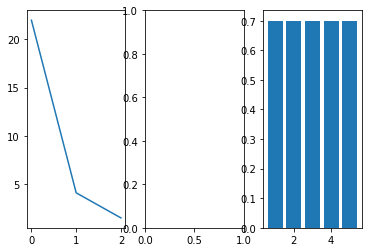

In [443]:
dot4 = lambda v1, v2, v3, v4: np.dot(np.dot(v1, v2), np.dot(v3, v4))

def cost(H, z, x, a):
    jo = 0.5 * np.dot((z - np.dot(H, x)).T, z - np.dot(H, x))
    jb = a * np.abs(x).sum()
    return jo[0,0] + jb

def CG(H, z, x, a, n):
    
    z = z[:,None]
    x = x[:,None]
    
    A = np.dot(H.T, H)
    b1 = np.dot(H.T, z)
    b2 = - a * np.sign(x)
    r = b1 + b2 - np.dot(A, x)
    p = r
    
    J = [cost(H, z, x, a)]
    
    for i in range(100):
        
        alpha = np.dot(r.T, p) / dot3(p.T, A, p)
        x += alpha[0,0] * p
        
        rb = r.copy()
        r = rb - alpha[0,0] * np.dot(A, p)
        if (r<1e-8).all():
            break
        
        J.append(cost(H, z, x, a))
        
        
        beta = np.dot(r.T, r) / np.dot(rb.T, rb)
        #print beta
        p = r + beta[0,0] * p
    
    return x, J

a = 1.

x, J = CG(H, z1, np.zeros(n), a, n)

fig, ax = plt.subplots(1,3)
ax[0].plot(J)
#ax[1].plot(g)
ax[2].bar(np.arange(n)+1, x[0])

J

[22.0, 4.058118905719306, 1.4507553143281462]

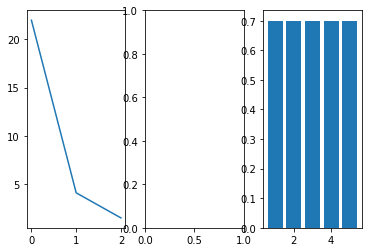

In [443]:
dot4 = lambda v1, v2, v3, v4: np.dot(np.dot(v1, v2), np.dot(v3, v4))

def cost(H, z, x, a):
    jo = 0.5 * np.dot((z - np.dot(H, x)).T, z - np.dot(H, x))
    jb = a * np.abs(x).sum()
    return jo[0,0] + jb

def CG(H, z, x, a, n):
    
    z = z[:,None]
    x = x[:,None]
    
    A = np.dot(H.T, H)
    b1 = np.dot(H.T, z)
    b2 = - a * np.sign(x)
    r = b1 + b2 - np.dot(A, x)
    p = r
    
    J = [cost(H, z, x, a)]
    
    for i in range(100):
        
        alpha = np.dot(r.T, p) / dot3(p.T, A, p)
        x += alpha[0,0] * p
        
        rb = r.copy()
        r = rb - alpha[0,0] * np.dot(A, p)
        if (r<1e-8).all():
            break
        
        J.append(cost(H, z, x, a))
        
        
        beta = np.dot(r.T, r) / np.dot(rb.T, rb)
        #print beta
        p = r + beta[0,0] * p
    
    return x, J

a = 1.

x, J = CG(H, z1, np.zeros(n), a, n)

fig, ax = plt.subplots(1,3)
ax[0].plot(J)
#ax[1].plot(g)
ax[2].bar(np.arange(n)+1, x[0])

J

In [164]:
x

array([0.72929916, 0.80771413, 0.        , 0.        , 0.00413749])

In [165]:
np.dot(x, x)

1.184296503831635

In [170]:
np.dot(x, x[None,:])

ValueError: shapes (5,) and (1,5) not aligned: 5 (dim 0) != 1 (dim 0)

In [169]:
np.dot(x[None,:], x[:,None])

array([[1.1842965]])